## Bootstrapping
- Non-parametric Stats + Computational-Simulations
- CLT: Sample means are Gaussian distributed with mean=population-mean.
- Q. How to estimate the population median (or other statistics) given a single sample (S)?
- Ans: Bootstrapping
- Assmumption: Each observed value in the sample (S) is randomly collected and are independent.


## Confidence Interval using Bootstrapping

* Bootstrapping can be used to compute the confidence intervals not only for the mean, but also for the other statistics like median,90th percentile etc.,

*  Let us assume we are given a random variable ‘X’ whose distribution is unknown.

1. Population -- ‘X’
2. Pick ‘S’ with sample size n. S = {x1, x2, x3, …., xn}
3. From ‘S’ pick ‘S1’,’S2’,’S3’……..’Sk’ k samples , with sample size m. where (m <=n)  <font color = 'red' > <b> by Sampling with Repetition </font></b>
4. we generate a uniform random variable U(1,n) and we run a loop for ‘m’ times, as we have to pick ‘m’ points into the sample ‘S1’. While running this loop for ‘m’ times and picking ‘m’ points randomly, we may get some repeated points.
5. These K samples are created artificially from the sample ‘S’ and hence they are called Bootstrap Samples.
6. Compute medians/means/or any other statistic from these bootstrap samples and sort them ascending.
7. From these sorted medians/means/or any other statistic we have to obtain the confidence intervals.
8. In case, if we want to compute the 95% confidence interval, as the remaining is 5%, we shall divide it into two halves and it would be 2.5% each. (It is because the CLT is applicable for not only mean, but also for other statistics like median, 90th percentile, etc.)

* Bootstrapping is a non-parametric approach which doesn’t make any assumptions about the distribution of the data used. If the bootstrap sample sizes are small, then the confidence intervals are wider. If the bootstrap samples are larger, then the confidence intervals are narrower.

<font color = 'blue' > <b> How is Bootstrapping better over the other techniques?</font></b>
* The reason for choosing bootstrapping is that it is a very generic technique that is extremely powerful and makes no assumptions about the underlying distribution.



In [13]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
# Synthetically create a sample with random and independent observations

# Let us use a sample of synthetic data (from some disb) 
# we generated so that we know the population medain to compare against
# Let sample from Beta disb with alpha = 2,beta=2 which has a population median of 0.5
# Refer: https://en.wikipedia.org/wiki/Beta_distribution Median ~ (alpha-1/3)/(alpha+beta-2/3) if alpaha, beta >1

n=100;
S = np.random.beta(2,2,n) # data can have any distribution.

#Q. Given S, how to estimate the popualtion median?

# function to generate a bootstrap(sampling with repalcement) sample of size n given a sample S. Each sample 
def bootstrapSample(S, m):

  n = S.size; # size of S
  indx = np.random.randint(n, size=m) # generates random integer indices from discrete unif random disb
  r = S[indx]
  return r


m = 50; # size of each bootstap sample
k = 1000; # number of botostrap samples

medians = np.zeros(k)

for i in range(k):
  medians[i] = np.median(bootstrapSample(S, m))

print(medians.size)

1000


In [4]:
# Now estimate median
print(np.mean(medians))

0.5024626642577968


In [5]:
print(np.median(medians))

0.4921174300912122


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


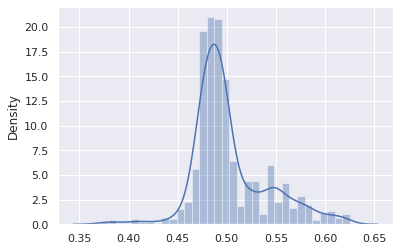

In [8]:
sns.set()
ax = sns.distplot(medians)


In [9]:
# 95% C.I on the medain estimate with n=100, m=50, k=1000

#https://docs.scipy.org/doc/numpy/reference/generated/numpy.percentile.html
lb_M = np.percentile(medians,2.5)
ub_M = np.percentile(medians,97.5)
mid_M = np.percentile(medians,50)

print(lb_M, mid_M, ub_M)

0.45483951941948036 0.4921174300912122 0.5983561682927464


In [10]:
# same experiment as above with same S, n=100, m=100, k=1000

n=100
m=100 # size of each bootstap sample
k=1000  # number of botostrap samples

medians = np.zeros(k)

for i in range(k):
  medians[i] = np.median(bootstrapSample(S, m))

print(medians.size)

lb_M = np.percentile(medians,2.5)
ub_M = np.percentile(medians,97.5)
mid_M = np.percentile(medians,50)

print(lb_M, mid_M, ub_M)

1000
0.47031809179405887 0.49109137109258827 0.5587139232630415


In [11]:
# same experiment as above with same S, n=100, m=200, k=1000

n=100
m=200 # size of each bootstap sample
k=1000  # number of botostrap samples

medians = np.zeros(k)

for i in range(k):
  medians[i] = np.median(bootstrapSample(S, m))

print(medians.size)

lb_M = np.percentile(medians,2.5)
ub_M = np.percentile(medians,97.5)
mid_M = np.percentile(medians,50)

print(lb_M, mid_M, ub_M)

1000
0.47568762127520514 0.4921174300912122 0.5453922462590737


## <font color='blue'>Understanding Permutation Resampling Test</font>

* Let us assume example of heights of students in classes 1 and 2 and problem that their heights are same.

<font color='brown'><b>Step 1:</b></font> take samples of the class 1 and class2 and find the mean of those samples and find 
$Δ = μ2 - μ1$

<font color='brown'><b>Step 2:</b></font> now join those two random variables and take two samples randomly  from that joined collection and find the difference of those sample means this difference be denoted as $𝛿1$.
 
<font color='brown'><b>Step 3:</b></font> We shall repeat this process for a certain number of times(say 10000) and obtain
all the values of the sample mean differences. Let them be denoted as $‘𝛿1’, ‘𝛿2’,
‘𝛿3’,........ ‘𝛿10k’.$
 
<font color='brown'><b>Step4:</b></font> now sort all these sample mean differences and let these sample means in the sorted order be denoted as ‘𝛿1|’, ‘𝛿2|’, ‘𝛿3|’,........ ‘𝛿10k|’. Now from the increasing order of these sample means, we have to check what percentage of the values are greater than ‘Δ’. (ie., $Δ = μ2 - μ1)$
 
<font color='brown'><b>Step5:</b></font> Let’s say 5% of the values are greater than ‘Δ’, then P - value = 5/100 = 0.05 If x% of the values are greater than ‘Δ’, then P - value = $x/100.)$

0.06624816891345076


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


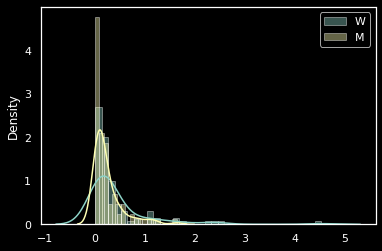

In [20]:
# Two sets of observations: Prices of prodcuts bought by men and women
# Again, let us use synthetic data so that we know if there is actually a differnce in population of Women and Men.

# Spends are pareto disb. Few people spend lots of money and most spend a small amount of money.
# Refer: https://en.wikipedia.org/wiki/Pareto_distribution
n=100; # sample size
np.random.seed(100)
#observed samples
PM = np.random.pareto(a=5.0,size=n)
PW = np.random.pareto(a=4.0,size=n)

# observed value of | W_Median-M_Median | 
obs =  abs(np.percentile(PW,50) - np.percentile(PM,50))
print(obs)

plt.style.use('dark_background')

sns.distplot(PW,label="W")
sns.distplot(PM, label="M")
plt.grid()
plt.legend()
plt.show()


# Now, from the way we generated the data, we know that W and M populations are slightly differnt 



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(*args, **kw)>

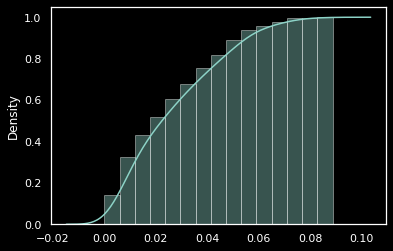

In [21]:
# Test-Statistic = abs(W_M - M_M)
# W_M : Median spend by women.
# M_M : Median spend by men.


# H0: Women and men spend the same amount


# P = Concatenate(PM, PW)
P = np.concatenate((PM,PW)) # tuple of arrays as param. Common mistake

k=1000 # number of resamplings
testStats = np.zeros(k)

for i in range(k):
  # resampling: split P into two random halves and tag hald as men and the rest as women.
  # Refer: https://stackoverflow.com/questions/3674409/how-to-split-partition-a-dataset-into-training-and-test-datasets-for-e-g-cros
  np.random.shuffle(P)
  tmp_men, tmp_women = P[:n], P[n:]

  # Compute test-statistic
  testStats[i] = abs(np.percentile(tmp_women,50) - np.percentile(tmp_men,50))

#CDF of testStats
kwargs = {'cumulative': True}
sns.distplot(testStats, hist_kws=kwargs, kde_kws=kwargs, )
plt.grid()
plt.show

In [16]:
# Hypothesis testing: P(testStat > Obs | H0 ) can be estimated from testStats.

obs =  abs(np.percentile(PW,50) - np.percentile(PM,50))
print(obs)

num_h0 = np.sum(testStats >=  obs)
prob = num_h0/k
print(prob)

# if Prob(testStat >= Obs | H0) < 0.05 
# then, it is very unlikely to observe the observed-difference and hence we reject H0
# else we accept H0


0.06624816891345076
0.036


In [22]:
# Let us write a function for this
def hypTestMedian(PW,PM):

  # observed value of W_Median-M_Median
  obs =  abs(np.percentile(PW,50) - np.percentile(PM,50))

  # H0: Women and men spend the same amount


  # P = Concatenate(PM, PW)
  P = np.concatenate((PM,PW)) # tuple of arrays as param. Common mistake

  k=1000 # number of resamplings
  testStats = np.zeros(k)

  for i in range(k):
    # resampling: split P into two random halves and tag hald as men and the rest as women.
    # Refer: https://stackoverflow.com/questions/3674409/how-to-split-partition-a-dataset-into-training-and-test-datasets-for-e-g-cros
    np.random.shuffle(P)
    tmp_men, tmp_women = P[:n], P[n:]

    # Compute test-statistic
    testStats[i] = abs(np.percentile(tmp_women,50) - np.percentile(tmp_men,50))

  # Hypothesis testing: P(testStat > Obs | H0 ) can be estimated from testStats.


  num_h0 = np.sum(testStats >=  obs)
  prob = num_h0/k
  return prob

In [23]:
#1.
n=100; # sample size

np.random.seed(100)
PM = np.random.pareto(a=5.0,size=n)
PW = np.random.pareto(a=4.0,size=n)
print(hypTestMedian(PW,PM))

0.036


In [24]:
#2.
n=100; # sample size

np.random.seed(100)
PM = np.random.pareto(a=5.0,size=n)
PW = np.random.pareto(a=3.0,size=n)
print(hypTestMedian(PW,PM))

0.0


In [25]:
#3.
n=100; # sample size

np.random.seed(100)
PM = np.random.pareto(a=5.0,size=n)
PW = np.random.pareto(a=5.0,size=n)
print(hypTestMedian(PW,PM))

0.343


In [27]:
#4.
n=100; # sample size

np.random.seed(100)
PM = np.random.pareto(a=5.0,size=n)
PW = np.random.pareto(a=4.5,size=n)
print(hypTestMedian(PW,PM))

0.162


* in scenarios 1 and 2 we reject null hypothesis and in scenarios 3 and 4 we fail to reject null hypothesis hence accept alternate hypothesis.